In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as pt
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
import imageio
import numpy as np
import imageio.v2 as imageio
import cv2

In [2]:
def save_upscaled_mp4(A, path, scale=20, fps=60):
    print(path)
    """
    A: (T, X, Y, 3) float in [0,1]
    """
    T, X, Y, _ = A.shape

    # Convert to uint8 once
    A8 = (A * 255).astype(np.uint8)

    frames = []
    for t in range(T):
        frame = A8[t]

        # nearest-neighbor upscale (pixel replication)
        frame = frame.repeat(scale, axis=0).repeat(scale, axis=1)

        # overlay timestep text
        cv2.putText(
            frame,
            f"timestep = [{t}]",
            (10, 30),  # text position
            cv2.FONT_HERSHEY_SIMPLEX,
            1.0,
            (255, 255, 255),  # white text
            2,
            cv2.LINE_AA
        )

        frames.append(frame)

    # save mp4
    imageio.mimwrite(
        path,
        frames,
        fps=fps,
        codec="libx264",
        quality=8,
        pixelformat="yuv420p",  # PowerPoint-safe
    )


In [3]:
def get_exp(exp_no):
    exp = np.load(f'dataNNC/exp{exp_no}.npy', allow_pickle=True).item()
    img = exp['NCV_color']
    save_upscaled_mp4(img, f'animNNC/nnc{exp_no}.mp4')

    exp = np.load(f'dataNCN/exp{exp_no}.npy', allow_pickle=True).item()
    img = exp['NCV_color']
    save_upscaled_mp4(img, f'animNCN/ncn{exp_no}.mp4')

In [5]:
save_upscaled_mp4(img, 'nnc5.mp4')

nnc5.mp4


In [7]:
get_exp(1)
get_exp(2)
get_exp(3)
get_exp(5)
get_exp(6)
get_exp(7)

animNCN/nnc1.mp4
animNCN/ncn1.mp4
animNCN/nnc2.mp4
animNCN/ncn2.mp4
animNCN/nnc3.mp4
animNCN/ncn3.mp4
animNCN/nnc5.mp4
animNCN/ncn5.mp4
animNCN/nnc6.mp4
animNCN/ncn6.mp4
animNCN/nnc7.mp4
animNCN/ncn7.mp4


In [9]:
get_exp(4)
get_exp(8)

animNNC/nnc4.mp4
animNCN/ncn4.mp4
animNNC/nnc8.mp4
animNCN/ncn8.mp4


In [4]:
get_exp(9)

animNNC/nnc9.mp4
animNCN/ncn9.mp4


In [10]:
#exp10:
get_exp(10)

animNNC/nnc10.mp4
animNCN/ncn10.mp4


In [11]:
#exp10:
get_exp(11)

animNNC/nnc11.mp4
animNCN/ncn11.mp4


In [12]:
exp = np.load(f'dataNNC/exp11.npy', allow_pickle=True).item()

In [18]:
grid = exp['NCV_grid']
timesteps=1000
N=50
N_color = np.array([0,0,1])
C_color = np.array([1,0,0]) 
V_color = np.array([0,0,0])
color_matrix = np.array([N_color, C_color, V_color])

NCV_color = np.zeros((timesteps,N+2,N+2,3))
'''for t in tqdm(range(timesteps)):
    for i in range(N+2):
        for j in range(N+2):
            NCV_color1[t,i,j] = N_color * NCV_grid2[t,i,j,0] + C_color * NCV_grid2[t,i,j,1] + V_color * NCV_grid2[t,i,j,2]
'''
NCV_color = grid @ color_matrix

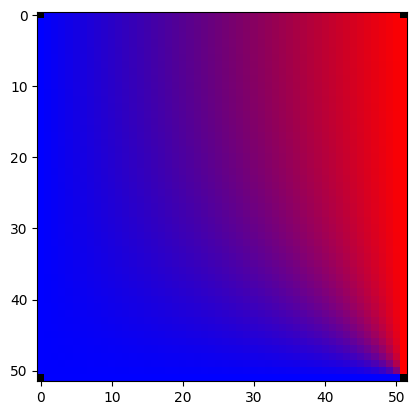

In [36]:
plt.imshow(NCV_color[999])

In [31]:
NCV_color.shape

(1000, 52, 52, 3)

In [43]:
C_color = grid[:,:,:,1]
N_color = grid[:,:,:,0]

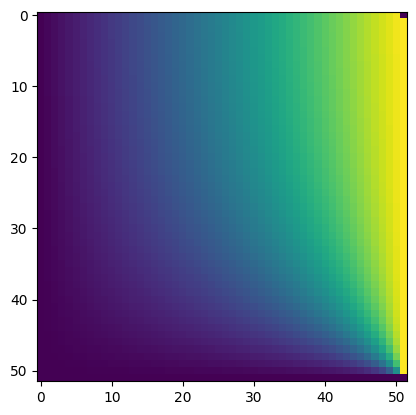

In [44]:
plt.imshow(C_color[999])

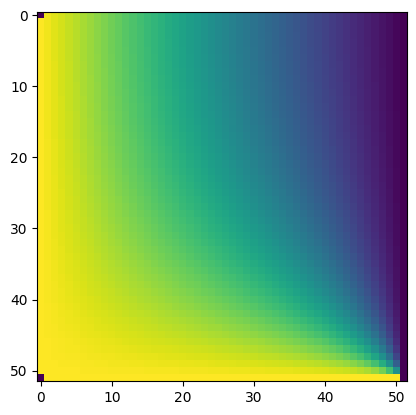

In [45]:
plt.imshow(N_color[999])